In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/cleanedLaptopData.csv")

In [ ]:
df.head(10)

,name,brand,price (đ),link_item,link_img,ram (GB),rom (GB),rom_type,rate,quantity_sale,original price (đ),discount percent
0,Laptop Asus Vivobook Go 15 E1504FA R5 7520U/16...,Asus,12690000,https://www.thegioididong.com/laptop/asus-vivo...,https://cdn.tgdd.vn/Products/Images/44/311178/...,16,512,SSD,4.9,14700.0,14490000,12
1,Laptop Dell Inspiron 15 3520 i5 1235U/16GB/512...,Dell,16490000,https://www.thegioididong.com/laptop/dell-insp...,https://cdn.tgdd.vn/Products/Images/44/325242/...,16,512,SSD,5.0,7400.0,16990000,0
2,Laptop HP 15 fc0085AU R5 7430U/16GB/512GB/Win1...,HP,13690000,https://www.thegioididong.com/laptop/hp-15-fc0...,https://cdnv2.tgdd.vn/mwg-static/tgdd/Products...,16,512,SSD,4.9,5400.0,15190000,9
3,Laptop Acer Aspire 3 A315 44P R9W8 R7 5700U/8G...,Acer,10990000,https://www.thegioididong.com/laptop/acer-aspi...,https://cdn.tgdd.vn/Products/Images/44/321436/...,8,512,SSD,4.9,3300.0,12990000,15
4,Laptop Lenovo Ideapad Slim 3 15IAH8 i5 12450H/...,Lenovo,14190000,https://www.thegioididong.com/laptop/lenovo-id...,https://cdn.tgdd.vn/Products/Images/44/313333/...,16,512,SSD,4.9,7300.0,15990000,11
5,Laptop Apple MacBook Air 13 inch M1 8GB/256GB,MacBook,17790000,https://www.thegioididong.com/laptop/apple-mac...,https://cdn.tgdd.vn/Products/Images/44/231244/...,8,256,SSD,4.9,11700.0,19990000,11
6,Laptop Asus Vivobook 15 X1504ZA i3 1215U/8GB/5...,Asus,9990000,https://www.thegioididong.com/laptop/asus-vivo...,https://cdn.tgdd.vn/Products/Images/44/312414/...,8,512,SSD,4.9,8700.0,12290000,18
7,Laptop HP 15 fd0234TU i5 1334U/16GB/512GB/Win1...,HP,16690000,https://www.thegioididong.com/laptop/hp-15-fd0...,https://cdn.tgdd.vn/Products/Images/44/323920/...,16,512,SSD,4.9,4900.0,19790000,15
8,Laptop Acer Aspire Lite 14 51M 59BN i5 1235U/1...,Acer,13590000,https://www.thegioididong.com/laptop/acer-aspi...,https://cdn.tgdd.vn/Products/Images/44/326637/...,16,512,SSD,4.9,2400.0,14990000,9
9,Laptop Lenovo Ideapad Slim 3 15AMN8 R5 7520U/1...,Lenovo,12690000,https://www.thegioididong.com/laptop/lenovo-id...,https://cdn.tgdd.vn/Products/Images/44/325500/...,16,512,SSD,4.9,3000.0,14390000,11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                329 non-null    object 
 1   brand               329 non-null    object 
 2   price (đ)           329 non-null    int64  
 3   link_item           329 non-null    object 
 4   link_img            329 non-null    object 
 5   ram (GB)            329 non-null    int64  
 6   rom (GB)            329 non-null    int64  
 7   rom_type            329 non-null    object 
 8   rate                329 non-null    float64
 9   quantity_sale       329 non-null    float64
 10  original price (đ)  329 non-null    int64  
 11  discount percent    329 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 31.0+ KB


In [ ]:
df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
price (đ),329.0,27438632.22,15305335.62,7990000.0,17790000.0,22990000.0,31490000.0,98490000.0
ram (GB),329.0,18.48,9.29,4.0,16.0,16.0,16.0,96.0
rom (GB),329.0,641.36,265.59,32.0,512.0,512.0,512.0,2048.0
rate,329.0,4.32,1.68,0.0,4.9,5.0,5.0,5.0
quantity_sale,329.0,868.50,1672.39,0.0,15.0,182.0,1000.0,14700.0
original price (đ),329.0,27748905.78,16106813.45,0.0,19490000.0,24990000.0,31990000.0,109990000.0
discount percent,329.0,8.21,7.02,0.0,0.0,7.0,11.0,39.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Tạo bộ mã hóa
label_encoder_brand = LabelEncoder()
label_encoder_rom = LabelEncoder()

# Áp dụng cho cột "brand" và "rom_type"
df["brand_encoded"] = label_encoder_brand.fit_transform(df["brand"])
df["rom_type_encoded"] = label_encoder_rom.fit_transform(df["rom_type"])

# Kiểm tra kết quả
# In danh sách thương hiệu đã được mã hóa
unique_brands = list(label_encoder_brand.classes_)
print(f"Tổng số thương hiệu: {len(unique_brands)}")
print("Danh sách thương hiệu và mã hóa:")
for i, brand in enumerate(unique_brands):
    print(f"{i}: {brand}")

Tổng số thương hiệu: 9
Danh sách thương hiệu và mã hóa:
0: Acer
1: Asus
2: Dell
3: HP
4: LG
5: Lenovo
6: MSI
7: MacBook
8: Samsung


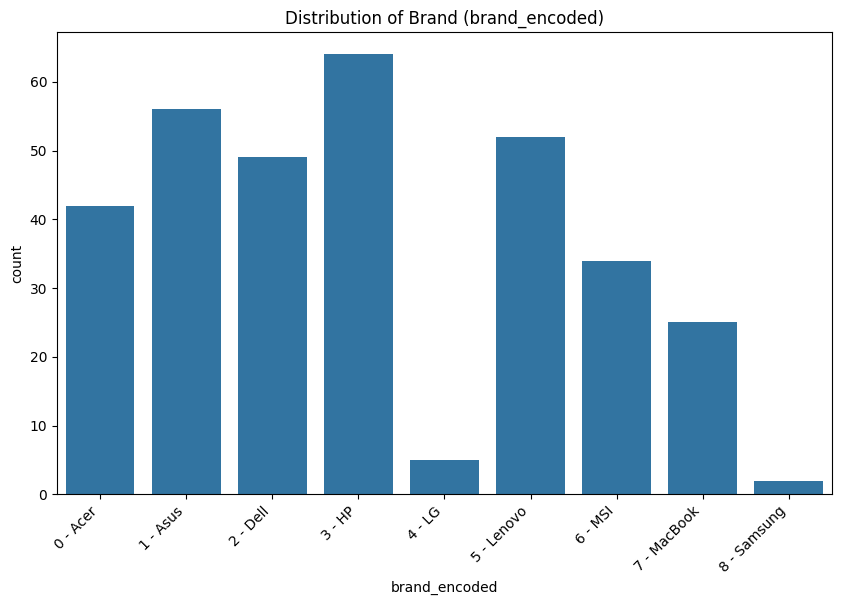

Brand 0 (Acer): 42 sản phẩm
Brand 1 (Asus): 56 sản phẩm
Brand 2 (Dell): 49 sản phẩm
Brand 3 (HP): 64 sản phẩm
Brand 4 (LG): 5 sản phẩm
Brand 5 (Lenovo): 52 sản phẩm
Brand 6 (MSI): 34 sản phẩm
Brand 7 (MacBook): 25 sản phẩm
Brand 8 (Samsung): 2 sản phẩm


In [ ]:
# Vẽ biểu đồ cột với brand_encoded
plt.figure(figsize=(10, 6))
sns.countplot(x="brand_encoded", data=df)

plt.title("Distribution of Brand (brand_encoded)")
# Tạo nhãn trục x có cả số brand_encoded và tên thương hiệu
brand_codes = sorted(df["brand_encoded"].unique())
brand_labels = label_encoder_brand.inverse_transform(brand_codes)
combined_labels = [f"{code} - {brand}" for code, brand in zip(brand_codes, brand_labels)]

# Cập nhật nhãn trục x
plt.xticks(ticks=brand_codes, labels=combined_labels, rotation=45, ha="right")

# Hiển thị biểu đồ
plt.show()

brand_counts = df["brand_encoded"].value_counts().sort_index()
for brand_code, count in brand_counts.items():
    print(f"Brand {brand_code} ({label_encoder_brand.inverse_transform([brand_code])[0]}): {count} sản phẩm")

In [ ]:
# In danh sách loại ROM đã được mã hóa
unique_roms = list(label_encoder_rom.classes_)
print(f"Tổng số loại ROM: {len(unique_roms)}")
print("Danh sách loại ROM và mã hóa:")
for i, rom in enumerate(unique_roms):
    print(f"{i}: {rom}")


Tổng số loại ROM: 2
Danh sách loại ROM và mã hóa:
0: SSD 
1: eMMC 


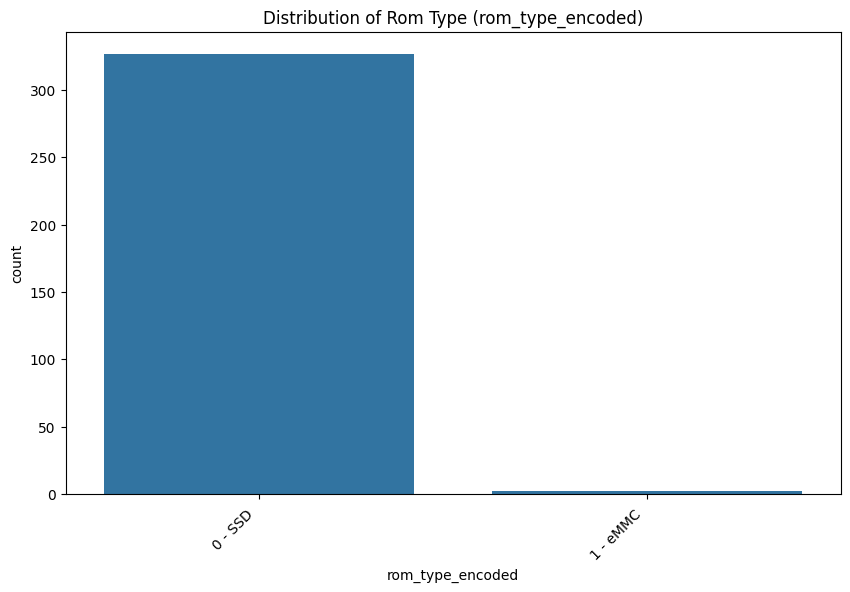

Loại ROM 0 (SSD ): 327 sản phẩm
Loại ROM 1 (eMMC ): 2 sản phẩm


In [ ]:
#Vẽ biểu đồ cột với rom_type_encoded
plt.figure(figsize=(10, 6))
sns.countplot(x="rom_type_encoded", data=df)

plt.title("Distribution of Rom Type (rom_type_encoded)")
# Tạo nhãn trục x có cả số rom_type_encoded và tên thương hiệu
rom_codes = sorted(df["rom_type_encoded"].unique())
rom_labels = label_encoder_rom.inverse_transform(rom_codes)
combined_labels = [f"{code} - {rom}" for code, rom in zip(rom_codes, rom_labels)]

# Cập nhật nhãn trục x
plt.xticks(ticks=rom_codes, labels=combined_labels, rotation=45, ha="right")

# Hiển thị biểu đồ
plt.show()



rom_counts = df["rom_type_encoded"].value_counts().sort_index()
for rom_code, count in rom_counts.items():
    print(f"Loại ROM {rom_code} ({label_encoder_rom.inverse_transform([rom_code])[0]}): {count} sản phẩm")

In [ ]:
df.drop(['brand', 'rom_type'], axis=1, inplace=True)

In [ ]:
df.head(10)

,name,price (đ),link_item,link_img,ram (GB),rom (GB),rate,quantity_sale,original price (đ),discount percent,brand_encoded,rom_type_encoded
0,Laptop Asus Vivobook Go 15 E1504FA R5 7520U/16...,12690000,https://www.thegioididong.com/laptop/asus-vivo...,https://cdn.tgdd.vn/Products/Images/44/311178/...,16,512,4.9,14700.0,14490000,12,1,0
1,Laptop Dell Inspiron 15 3520 i5 1235U/16GB/512...,16490000,https://www.thegioididong.com/laptop/dell-insp...,https://cdn.tgdd.vn/Products/Images/44/325242/...,16,512,5.0,7400.0,16990000,0,2,0
2,Laptop HP 15 fc0085AU R5 7430U/16GB/512GB/Win1...,13690000,https://www.thegioididong.com/laptop/hp-15-fc0...,https://cdnv2.tgdd.vn/mwg-static/tgdd/Products...,16,512,4.9,5400.0,15190000,9,3,0
3,Laptop Acer Aspire 3 A315 44P R9W8 R7 5700U/8G...,10990000,https://www.thegioididong.com/laptop/acer-aspi...,https://cdn.tgdd.vn/Products/Images/44/321436/...,8,512,4.9,3300.0,12990000,15,0,0
4,Laptop Lenovo Ideapad Slim 3 15IAH8 i5 12450H/...,14190000,https://www.thegioididong.com/laptop/lenovo-id...,https://cdn.tgdd.vn/Products/Images/44/313333/...,16,512,4.9,7300.0,15990000,11,5,0
5,Laptop Apple MacBook Air 13 inch M1 8GB/256GB,17790000,https://www.thegioididong.com/laptop/apple-mac...,https://cdn.tgdd.vn/Products/Images/44/231244/...,8,256,4.9,11700.0,19990000,11,7,0
6,Laptop Asus Vivobook 15 X1504ZA i3 1215U/8GB/5...,9990000,https://www.thegioididong.com/laptop/asus-vivo...,https://cdn.tgdd.vn/Products/Images/44/312414/...,8,512,4.9,8700.0,12290000,18,1,0
7,Laptop HP 15 fd0234TU i5 1334U/16GB/512GB/Win1...,16690000,https://www.thegioididong.com/laptop/hp-15-fd0...,https://cdn.tgdd.vn/Products/Images/44/323920/...,16,512,4.9,4900.0,19790000,15,3,0
8,Laptop Acer Aspire Lite 14 51M 59BN i5 1235U/1...,13590000,https://www.thegioididong.com/laptop/acer-aspi...,https://cdn.tgdd.vn/Products/Images/44/326637/...,16,512,4.9,2400.0,14990000,9,0,0
9,Laptop Lenovo Ideapad Slim 3 15AMN8 R5 7520U/1...,12690000,https://www.thegioididong.com/laptop/lenovo-id...,https://cdn.tgdd.vn/Products/Images/44/325500/...,16,512,4.9,3000.0,14390000,11,5,0


Chia các laptop theo từng phân khúc giá, ở đây chia làm 4 nhóm:
- Giá rẻ: < 10 triệu
- Tầm trung: 10 triệu - 20 triệu
- Cận cao cấp: 20 triệu - 30 triệu
- Cao cấp: > 30 triệu

In [ ]:
df.head(5)

,name,price (đ),link_item,link_img,ram (GB),rom (GB),rate,quantity_sale,original price (đ),discount percent,brand_encoded,rom_type_encoded
0,Laptop Asus Vivobook Go 15 E1504FA R5 7520U/16...,12690000,https://www.thegioididong.com/laptop/asus-vivo...,https://cdn.tgdd.vn/Products/Images/44/311178/...,16,512,4.9,14700.0,14490000,12,1,0
1,Laptop Dell Inspiron 15 3520 i5 1235U/16GB/512...,16490000,https://www.thegioididong.com/laptop/dell-insp...,https://cdn.tgdd.vn/Products/Images/44/325242/...,16,512,5.0,7400.0,16990000,0,2,0
2,Laptop HP 15 fc0085AU R5 7430U/16GB/512GB/Win1...,13690000,https://www.thegioididong.com/laptop/hp-15-fc0...,https://cdnv2.tgdd.vn/mwg-static/tgdd/Products...,16,512,4.9,5400.0,15190000,9,3,0
3,Laptop Acer Aspire 3 A315 44P R9W8 R7 5700U/8G...,10990000,https://www.thegioididong.com/laptop/acer-aspi...,https://cdn.tgdd.vn/Products/Images/44/321436/...,8,512,4.9,3300.0,12990000,15,0,0
4,Laptop Lenovo Ideapad Slim 3 15IAH8 i5 12450H/...,14190000,https://www.thegioididong.com/laptop/lenovo-id...,https://cdn.tgdd.vn/Products/Images/44/313333/...,16,512,4.9,7300.0,15990000,11,5,0


In [ ]:
variance = np.var(df["quantity_sale"], ddof=1)  # Phương sai (variance)
std_dev = np.std(df["quantity_sale"], ddof=1)  # Độ lệch chuẩn (standard deviation)
data_range = np.max(df["quantity_sale"]) - np.min(df["quantity_sale"])  # Phạm vi (range)
iqr = np.percentile(df["quantity_sale"], 75) - np.percentile(df["quantity_sale"], 25)  # Khoảng tứ (IQR)
# Tính các giá trị thống kê của quantity_sale
statistics = {
    "Mean": np.mean(df["quantity_sale"]),
    "Weighted Mean (Weight = quantity_sale)": np.average(df["quantity_sale"], weights=df["quantity_sale"]),
    "Median (50th Percentile)": np.median(df["quantity_sale"]),
    "25th Percentile": np.percentile(df["quantity_sale"], 25),
    "75th Percentile": np.percentile(df["quantity_sale"], 75),
    "Min": np.min(df["quantity_sale"]),
    "Max": np.max(df["quantity_sale"]),
    "Standard Deviation": np.std(df["quantity_sale"], ddof=1),
    "Mode": df["quantity_sale"].mode()[0],  # Lấy giá trị mode đầu tiên nếu có nhiều mode
    "Outliers (Z-score > 3)": df["quantity_sale"][np.abs((df["quantity_sale"] - np.mean(df["quantity_sale"])) / np.std(df["quantity_sale"], ddof=1)) > 3].values,
    "Variance (Phương sai)": variance,
    "Standard Deviation (Độ lệch chuẩn)": std_dev,
    "Range (Phạm vi)": data_range,
    "IQR (Khoảng Tứ)": iqr,
}

# Hiển thị kết quả

statistics_df = pd.DataFrame(list(statistics.items()), columns=["Statistic", "Value"])
statistics_df

,Statistic,Value
0,Mean,868.49848
1,Weighted Mean (Weight = quantity_sale),4079.069316
2,Median (50th Percentile),182.0
3,25th Percentile,15.0
4,75th Percentile,1000.0
5,Min,0.0
6,Max,14700.0
7,Standard Deviation,1672.386629
8,Mode,0.0
9,Outliers (Z-score > 3),"[14700.0, 7400.0, 7300.0, 11700.0, 8700.0, 840..."


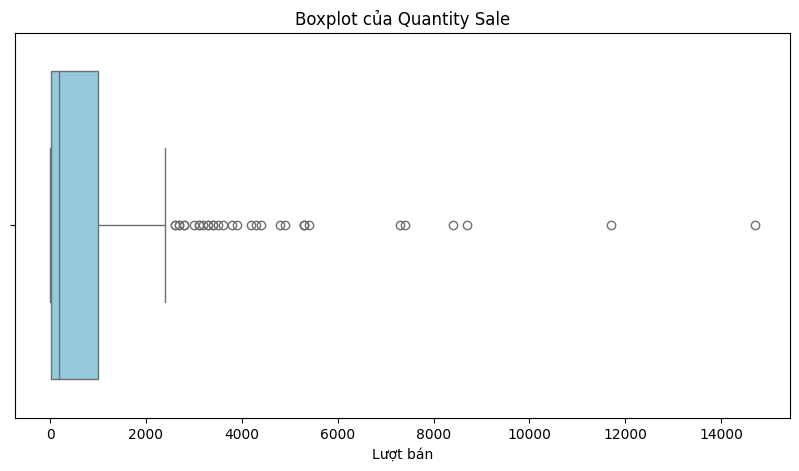

In [ ]:
# Vẽ boxplot của quantity_sale
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["quantity_sale"], color="skyblue")

# Tiêu đề và nhãn trục
plt.title("Boxplot của Quantity Sale")
plt.xlabel("Lượt bán")

# Hiển thị biểu đồ
plt.show()


Có thể thấy Quantity_sale có quá nhiều outliers, tiến hành phân nhóm cho quantity_sale theo tứ phân vị

In [ ]:
df["quantity_sale_group"] = pd.qcut(df["quantity_sale"], q=4, labels=["Thấp", "Trung bình", "Cao", "Rất cao"])

In [ ]:
# Áp dụng Label Encoding
label_encoder_quantity = LabelEncoder()
df["quantity_sale_encoded"] = label_encoder_quantity.fit_transform(df["quantity_sale_group"])

# Kiểm tra thứ tự mã hóa
encoded_mapping = dict(zip(label_encoder_quantity.classes_, label_encoder_quantity.transform(label_encoder_quantity.classes_)))

print("Thứ tự mã hóa:")
for group, encoded_value in encoded_mapping.items():
    print(f"{group}: {encoded_value}")

Thứ tự mã hóa:
Cao: 0
Rất cao: 1
Thấp: 2
Trung bình: 3


In [ ]:
df.head(10)

,name,price (đ),link_item,link_img,ram (GB),rom (GB),rate,quantity_sale,original price (đ),discount percent,brand_encoded,rom_type_encoded,quantity_sale_group,quantity_sale_encoded
0,Laptop Asus Vivobook Go 15 E1504FA R5 7520U/16...,12690000,https://www.thegioididong.com/laptop/asus-vivo...,https://cdn.tgdd.vn/Products/Images/44/311178/...,16,512,4.9,14700.0,14490000,12,1,0,Rất cao,1
1,Laptop Dell Inspiron 15 3520 i5 1235U/16GB/512...,16490000,https://www.thegioididong.com/laptop/dell-insp...,https://cdn.tgdd.vn/Products/Images/44/325242/...,16,512,5.0,7400.0,16990000,0,2,0,Rất cao,1
2,Laptop HP 15 fc0085AU R5 7430U/16GB/512GB/Win1...,13690000,https://www.thegioididong.com/laptop/hp-15-fc0...,https://cdnv2.tgdd.vn/mwg-static/tgdd/Products...,16,512,4.9,5400.0,15190000,9,3,0,Rất cao,1
3,Laptop Acer Aspire 3 A315 44P R9W8 R7 5700U/8G...,10990000,https://www.thegioididong.com/laptop/acer-aspi...,https://cdn.tgdd.vn/Products/Images/44/321436/...,8,512,4.9,3300.0,12990000,15,0,0,Rất cao,1
4,Laptop Lenovo Ideapad Slim 3 15IAH8 i5 12450H/...,14190000,https://www.thegioididong.com/laptop/lenovo-id...,https://cdn.tgdd.vn/Products/Images/44/313333/...,16,512,4.9,7300.0,15990000,11,5,0,Rất cao,1
5,Laptop Apple MacBook Air 13 inch M1 8GB/256GB,17790000,https://www.thegioididong.com/laptop/apple-mac...,https://cdn.tgdd.vn/Products/Images/44/231244/...,8,256,4.9,11700.0,19990000,11,7,0,Rất cao,1
6,Laptop Asus Vivobook 15 X1504ZA i3 1215U/8GB/5...,9990000,https://www.thegioididong.com/laptop/asus-vivo...,https://cdn.tgdd.vn/Products/Images/44/312414/...,8,512,4.9,8700.0,12290000,18,1,0,Rất cao,1
7,Laptop HP 15 fd0234TU i5 1334U/16GB/512GB/Win1...,16690000,https://www.thegioididong.com/laptop/hp-15-fd0...,https://cdn.tgdd.vn/Products/Images/44/323920/...,16,512,4.9,4900.0,19790000,15,3,0,Rất cao,1
8,Laptop Acer Aspire Lite 14 51M 59BN i5 1235U/1...,13590000,https://www.thegioididong.com/laptop/acer-aspi...,https://cdn.tgdd.vn/Products/Images/44/326637/...,16,512,4.9,2400.0,14990000,9,0,0,Rất cao,1
9,Laptop Lenovo Ideapad Slim 3 15AMN8 R5 7520U/1...,12690000,https://www.thegioididong.com/laptop/lenovo-id...,https://cdn.tgdd.vn/Products/Images/44/325500/...,16,512,4.9,3000.0,14390000,11,5,0,Rất cao,1


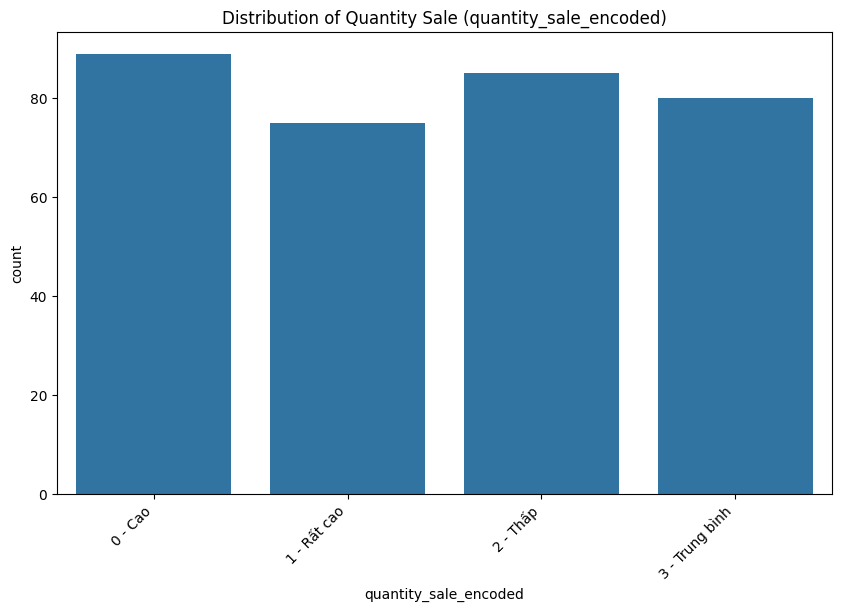

Lượt bán 0 (Cao): 89 sản phẩm
Lượt bán 1 (Rất cao): 75 sản phẩm
Lượt bán 2 (Thấp): 85 sản phẩm
Lượt bán 3 (Trung bình): 80 sản phẩm


In [ ]:
#Vẽ biểu đồ cột với rom_type_encoded
plt.figure(figsize=(10, 6))
sns.countplot(x="quantity_sale_encoded", data=df)

plt.title("Distribution of Quantity Sale (quantity_sale_encoded)")

# Tạo nhãn trục x có cả số rom_type_encoded và tên thương hiệu
quantity_codes = sorted(df["quantity_sale_encoded"].unique())
quantity_labels = label_encoder_quantity.inverse_transform(quantity_codes)
combined_labels = [f"{code} - {quantity}" for code, quantity in zip(quantity_codes, quantity_labels)]

# Cập nhật nhãn trục x
plt.xticks(ticks=quantity_codes, labels=combined_labels, rotation=45, ha="right")

# Hiển thị biểu đồ
plt.show()



quantity_counts = df["quantity_sale_encoded"].value_counts().sort_index()
for quantity_code, count in quantity_counts.items():
    print(f"Lượt bán {quantity_code} ({label_encoder_quantity.inverse_transform([quantity_code])[0]}): {count} sản phẩm")

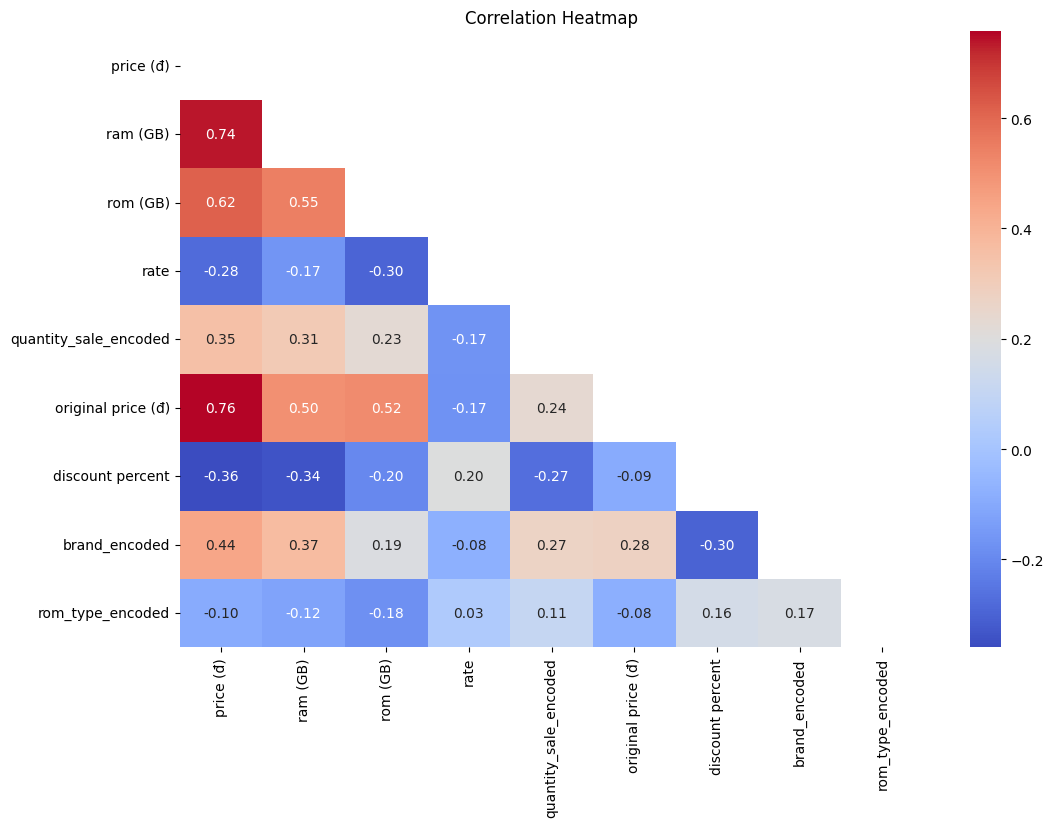

In [ ]:

# Compute the correlation matrix
df1 = df[['price (đ)', 'ram (GB)', 'rom (GB)', 'rate', 'quantity_sale_encoded', 'original price (đ)', 'discount percent', 'brand_encoded', 'rom_type_encoded']]
corr_matrix = df1.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=np.triu(corr_matrix))
plt.title('Correlation Heatmap')
plt.show()


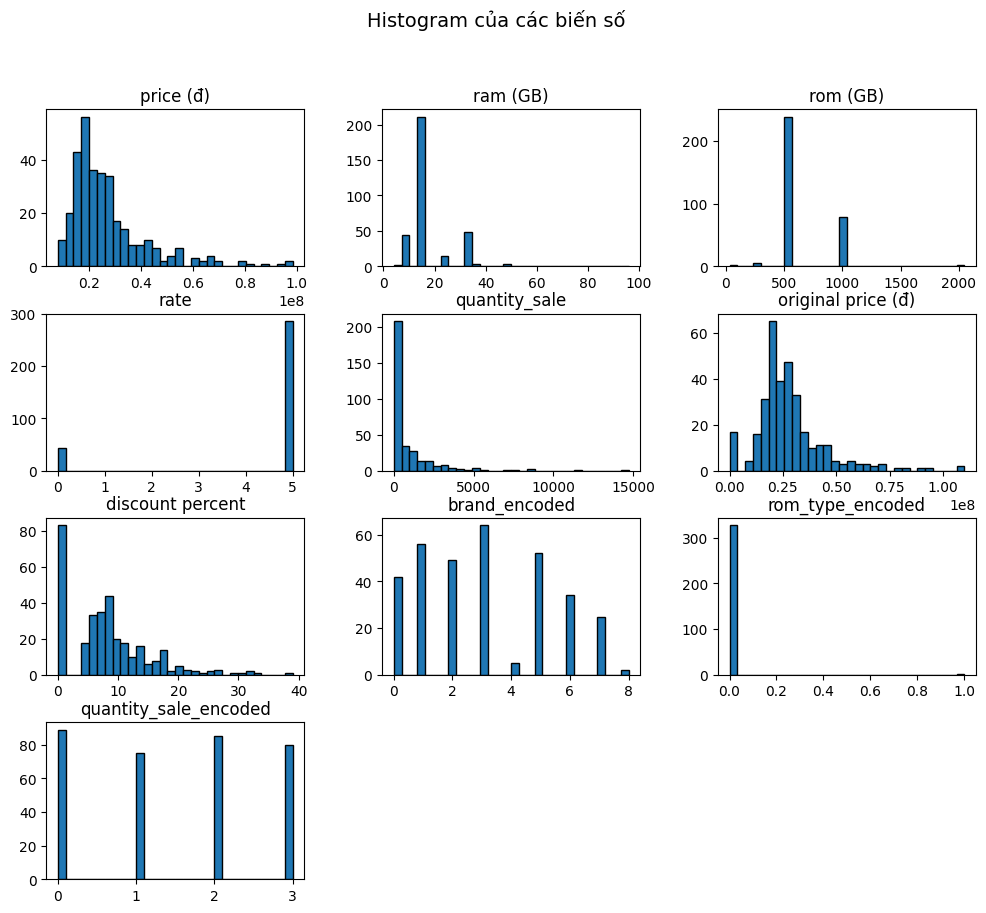

In [ ]:
import matplotlib.pyplot as plt

# Kiểm tra nếu df tồn tại trước khi vẽ biểu đồ
if 'df' in locals() or 'df' in globals():
    # Chọn các cột số để vẽ histogram
    numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

    # Vẽ histogram cho từng biến số
    df[numeric_cols].hist(figsize=(12, 10), bins=30, edgecolor='black', grid=False)
    plt.suptitle("Histogram của các biến số", fontsize=14)
    plt.show()
else:
    print("Dữ liệu df chưa được xác định. Vui lòng cung cấp dữ liệu.")


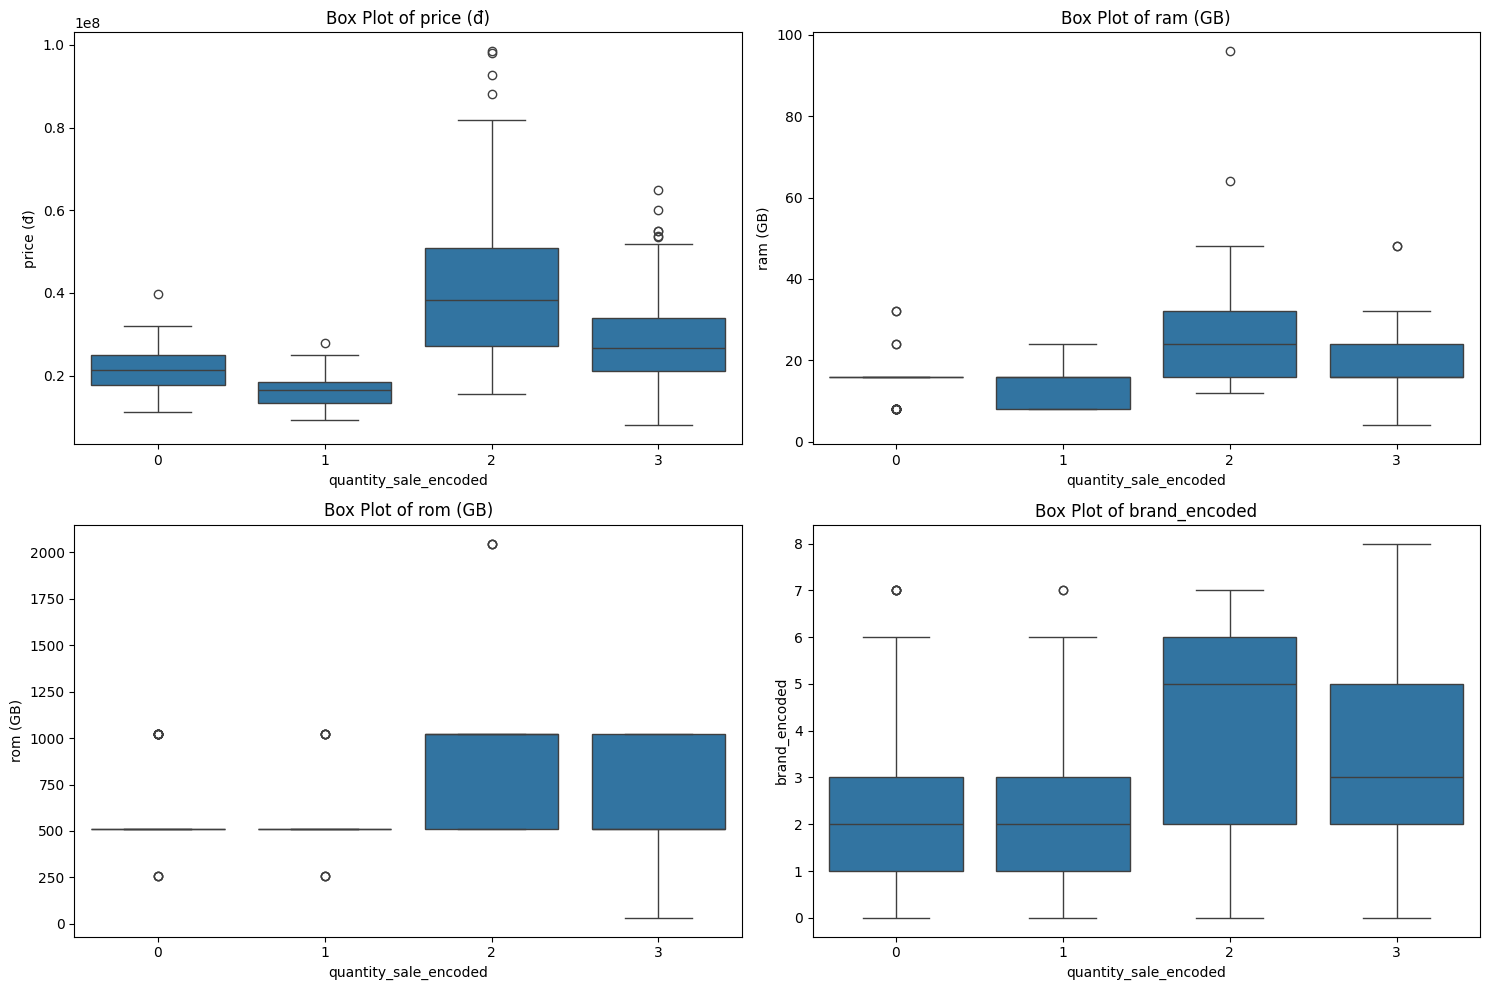

In [ ]:

features = [
    'price (đ)', 'ram (GB)', 'rom (GB)', 'brand_encoded'
]

# Create box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='quantity_sale_encoded', y=col, data=df)
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


# Mô hình phân lớp

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
# Select the required columns and convert to Pandas
required_columns = [
    'price (đ)', 'ram (GB)', 'rom (GB)', 'brand_encoded', 'quantity_sale_encoded'
]
df_pd = df[required_columns]

# Define features and target
X = df_pd.drop(columns=['quantity_sale_encoded'])
y = df_pd['quantity_sale_encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]             # Whether bootstrap samples are used when building trees
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,                          # 5-fold cross-validation
    scoring='accuracy',            # Metric to optimize
    n_jobs=-1,                     # Use all available cores
    verbose=2                      # Verbose output
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best parameters and best estimator
print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

# Predict and evaluate the model with the best parameters
rf_predictions = best_rf_model.predict(X_test)
print("Optimized Random Forest Model Performance:")
print(classification_report(y_test, rf_predictions))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Optimized Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.44      0.44      0.44        16
           1       0.58      0.83      0.68        18
           2       0.71      0.59      0.65        17
           3       0.50      0.33      0.40        15

    accuracy                           0.56        66
   macro avg       0.56      0.55      0.54        66
weighted avg       0.56      0.56      0.55        66



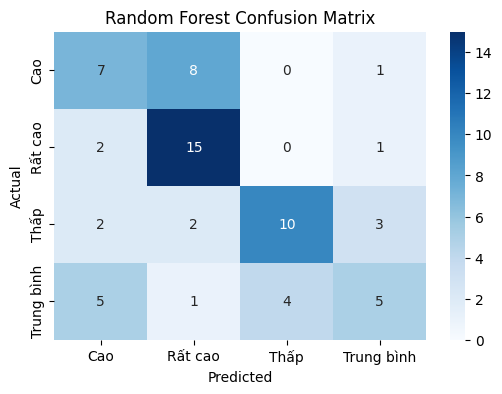

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, rf_predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Cao", "Rất cao", "Thấp", "Trung bình"], yticklabels=["Cao", "Rất cao", "Thấp", "Trung bình"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

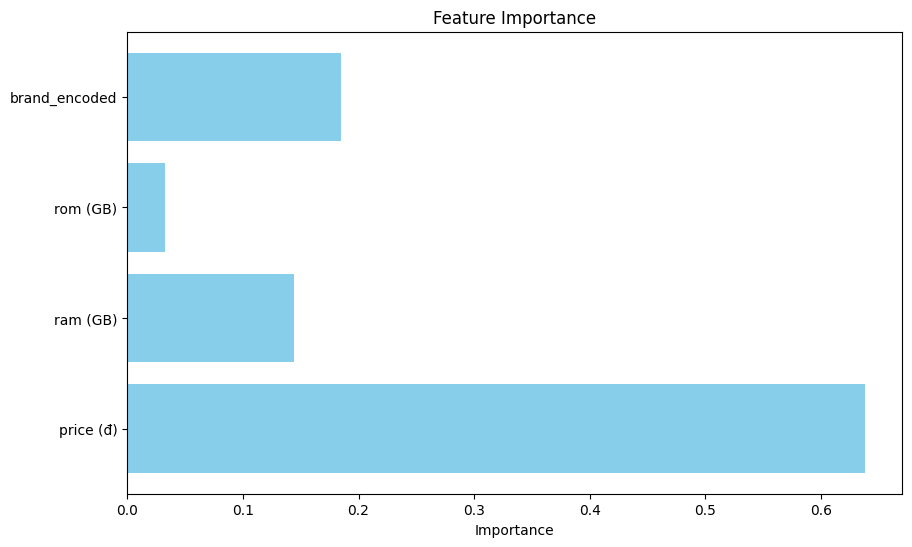

In [ ]:

# Get feature importances
importances = best_rf_model.feature_importances_
features = X.columns

# Create a bar chart for feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [ ]:
from xgboost import XGBClassifier
# Define the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of boosting rounds
    'max_depth': [3, 5, 7],                # Maximum tree depth for base learners
    'learning_rate': [0.01, 0.1, 0.2],     # Step size shrinkage
    'subsample': [0.8, 1.0],               # Subsample ratio of training instances
    'colsample_bytree': [0.8, 1.0],        # Subsample ratio of columns when constructing each tree
    'gamma': [0, 1, 5]                     # Minimum loss reduction to make a further partition
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,                          # 5-fold cross-validation
    scoring='accuracy',            # Metric to optimize
    n_jobs=-1,                     # Use all available cores
    verbose=2                      # Verbose output
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best parameters and best estimator
print("Best Parameters:", grid_search.best_params_)
best_xgb_model = grid_search.best_estimator_

# Predict and evaluate the model with the best parameters
xgb_predictions = best_xgb_model.predict(X_test)
print("Optimized XGBoost Model Performance:")
print(classification_report(y_test, xgb_predictions))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Optimized XGBoost Model Performance:
              precision    recall  f1-score   support

           0       0.32      0.44      0.37        16
           1       0.61      0.78      0.68        18
           2       0.69      0.53      0.60        17
           3       0.38      0.20      0.26        15

    accuracy                           0.50        66
   macro avg       0.50      0.49      0.48        66
weighted avg       0.51      0.50      0.49        66



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:31:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


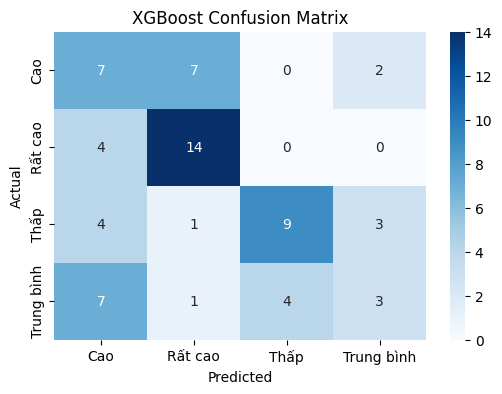

In [ ]:

# Generate confusion matrix for XGBoost
xgb_cm = confusion_matrix(y_test, xgb_predictions)

# Plot confusion matrix for XGBoost
plt.figure(figsize=(6, 4))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Cao", "Rất cao", "Thấp", "Trung bình"], yticklabels=["Cao", "Rất cao", "Thấp", "Trung bình"])
plt.title("XGBoost Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

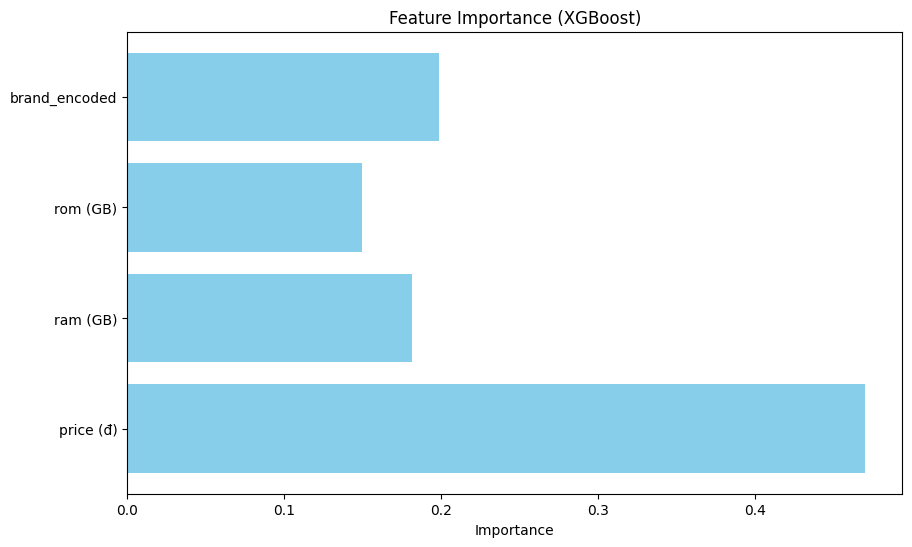

In [ ]:

# Get feature importance from XGBoost model
xgb_importances = best_xgb_model.feature_importances_
features = X.columns

# Create a bar chart for feature importance from XGBoost
plt.figure(figsize=(10, 6))
plt.barh(features, xgb_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (XGBoost)')
plt.show()

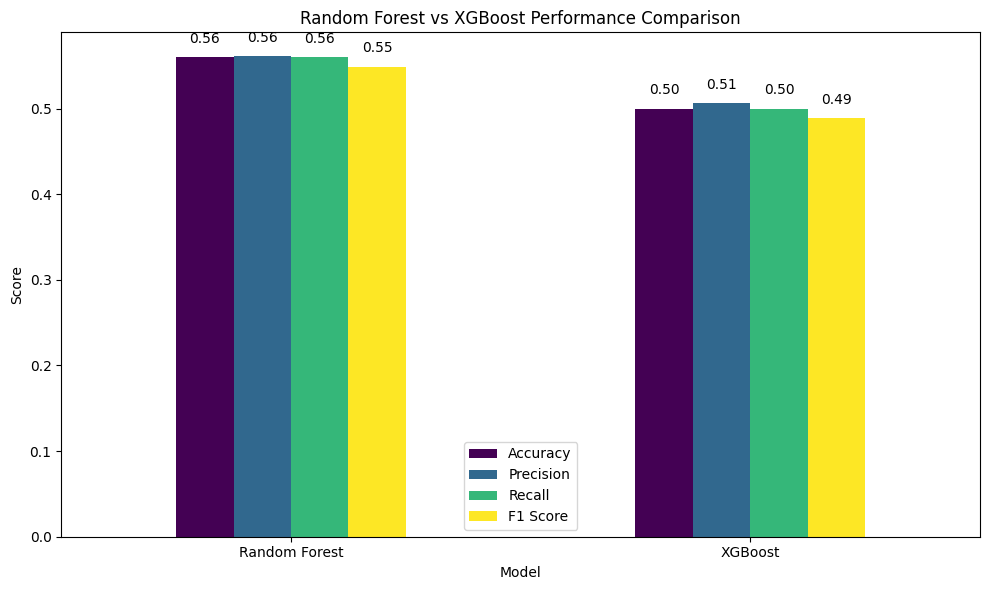

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for XGBoost, specifying 'weighted' average for multiclass
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions, average='weighted') # Specify average='weighted'
xgb_recall = recall_score(y_test, xgb_predictions, average='weighted') # Specify average='weighted'
xgb_f1 = f1_score(y_test, xgb_predictions, average='weighted') # Specify average='weighted'


# Store performance metrics for both models
model_comparison_metrics = {
    'Model': ['Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_score(y_test, rf_predictions), xgb_accuracy],
    'Precision': [precision_score(y_test, rf_predictions, average='weighted'), xgb_precision], # Specify average='weighted'
    'Recall': [recall_score(y_test, rf_predictions, average='weighted'), xgb_recall], # Specify average='weighted'
    'F1 Score': [f1_score(y_test, rf_predictions, average='weighted'), xgb_f1] # Specify average='weighted'
}

# Convert to DataFrame for easier plotting
comparison_df = pd.DataFrame(model_comparison_metrics)

# Plot model comparison
ax = comparison_df.set_index('Model').plot(kind='bar', figsize=(10, 6), colormap='viridis')

# Add metric values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 8),  # 8 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Random Forest vs XGBoost Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()